# Introduction to Pandas
Data Mining Lab, UVic Summer 2020  <br>


In [2]:
import numpy as np
import pandas as pd

## Series (Only contains a single list with index)
### How to build it

* From NumPy array/List as the source of numerical data
* From dictionary

In [3]:
labels = ['a','b','c']
my_data = [10,20,30]
arr = np.array(my_data)
d = {'a':10,'b':20,'c':30}
ser1 = pd.Series(d)
print(ser1)
ser2 = pd.Series(my_data,index=labels)
print(ser2)

a    10
b    20
c    30
dtype: int64
a    10
b    20
c    30
dtype: int64


### Adding/Merging two series with common indices

In [4]:
ser1 = pd.Series([1,2,3,4],['CA', 'OR', 'CO', 'AZ'])
print(ser1)
ser2 = pd.Series([1,2,5,4],['CA', 'OR', 'NV', 'AZ'])
print(ser1 + ser2)
print(ser1 * ser2)
print (np.exp(ser1)+np.log10(ser2))

CA    1
OR    2
CO    3
AZ    4
dtype: int64
AZ    8.0
CA    2.0
CO    NaN
NV    NaN
OR    4.0
dtype: float64
AZ    16.0
CA     1.0
CO     NaN
NV     NaN
OR     4.0
dtype: float64
AZ    55.200210
CA     2.718282
CO          NaN
NV          NaN
OR     7.690086
dtype: float64


# DataFrame (Collection of Series)


In [8]:
from numpy.random import randn as rn
matrix_data = rn(5,4)
print(matrix_data.shape)
row_labels = ['A','B','C','D','E']
column_headings = ['W','X','Y','Z']

df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
print(df)
print(df.describe())
#Indxing and Slicing by using bracket method
print(df[['X','Z']])

(5, 4)
          W         X         Y         Z
A -1.926203 -0.007552  0.472684  0.223006
B  0.207334 -1.644486  0.879384 -1.839049
C  0.684101  0.905803  0.552485 -0.402605
D -0.096164  1.415637  0.844134  2.482585
E  0.859008  0.516155 -0.790224  0.372994
              W         X         Y         Z
count  5.000000  5.000000  5.000000  5.000000
mean  -0.054385  0.237111  0.391693  0.167386
std    1.112834  1.174117  0.684085  1.561745
min   -1.926203 -1.644486 -0.790224 -1.839049
25%   -0.096164 -0.007552  0.472684 -0.402605
50%    0.207334  0.516155  0.552485  0.223006
75%    0.684101  0.905803  0.844134  0.372994
max    0.859008  1.415637  0.879384  2.482585
          X         Z
A -0.007552  0.223006
B -1.644486 -1.839049
C  0.905803 -0.402605
D  1.415637  2.482585
E  0.516155  0.372994


### Creating and deleting a (new) column (or row)


In [9]:
print("\nA column is created by assigning it in relation to an existing column\n",'-'*75, sep='')
df['New'] = df['X']+df['Z']
df['X+Z'] = df['X']+df['Z']
print(df)
print("\nA column is dropped by using df.drop() method\n",'-'*55, sep='')
df = df.drop('New', axis=1) # Notice the axis=1 option, axis = 0 is default, so one has to change it to 1
print(df)
df1=df.drop('A')
print("\nA row (index) is dropped by using df.drop() method and axis=0\n",'-'*65, sep='')
print(df1)
print("\nAn in-place change can be done by making inplace=True in the drop method\n",'-'*75, sep='')
df.drop('X+Z', axis=1, inplace=True)
print(df)


A column is created by assigning it in relation to an existing column
---------------------------------------------------------------------------
          W         X         Y         Z       New       X+Z
A -1.926203 -0.007552  0.472684  0.223006  0.215454  0.215454
B  0.207334 -1.644486  0.879384 -1.839049 -3.483535 -3.483535
C  0.684101  0.905803  0.552485 -0.402605  0.503198  0.503198
D -0.096164  1.415637  0.844134  2.482585  3.898221  3.898221
E  0.859008  0.516155 -0.790224  0.372994  0.889149  0.889149

A column is dropped by using df.drop() method
-------------------------------------------------------
          W         X         Y         Z       X+Z
A -1.926203 -0.007552  0.472684  0.223006  0.215454
B  0.207334 -1.644486  0.879384 -1.839049 -3.483535
C  0.684101  0.905803  0.552485 -0.402605  0.503198
D -0.096164  1.415637  0.844134  2.482585  3.898221
E  0.859008  0.516155 -0.790224  0.372994  0.889149

A row (index) is dropped by using df.drop() method and axis=0
---

### Selecting/indexing Rows
* Label-based 'loc' method
* Index (numeric) 'iloc' method

In [10]:
print("\nLabel-based 'loc' method can be used for selecting row(s)\n",'-'*60, sep='')
print("\nSingle row\n")
print(df.loc['C'])
print("\nMultiple rows\n")
print(df.loc[['B','C']])
print("\nIndex position based 'iloc' method can be used for selecting row(s)\n",'-'*70, sep='')
print("\nSingle row\n")
print(df.iloc[2])
print("\nMultiple rows\n")
print(df.iloc[[1,2]])


Label-based 'loc' method can be used for selecting row(s)
------------------------------------------------------------

Single row

W   -0.112592
X    0.046656
Y    0.277377
Z    1.015943
Name: C, dtype: float64

Multiple rows

          W         X         Y         Z
B -0.936290 -1.483546  0.132742 -0.592889
C -0.112592  0.046656  0.277377  1.015943

Index position based 'iloc' method can be used for selecting row(s)
----------------------------------------------------------------------

Single row

W   -0.112592
X    0.046656
Y    0.277377
Z    1.015943
Name: C, dtype: float64

Multiple rows

          W         X         Y         Z
B -0.936290 -1.483546  0.132742 -0.592889
C -0.112592  0.046656  0.277377  1.015943


### Subsetting DataFrame


In [11]:
np.random.seed(101)
matrix_data = rn(5,4)
row_labels = ['A','B','C','D','E']
column_headings = ['W','X','Y','Z']
df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)

print("\nThe DatFrame\n",'-'*45, sep='')
print(df)
print("\nElement at row 'B' and column 'Y' is\n") 
print(df.loc['B','Y'])
print("\nSubset comprising of rows B and D, and columns W and Y, is\n")
df.loc[['B','D'],['W','Y']]


The DatFrame
---------------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

Element at row 'B' and column 'Y' is

-0.8480769834036315

Subset comprising of rows B and D, and columns W and Y, is



,W,Y
B,0.651118,-0.848077
D,0.188695,-0.933237


In [12]:
print(df)
# print(df>0)
print(df[df>0])
print(df[df['W']>0])

#Let's create another dataframe


          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118       NaN       NaN  0.605965
C       NaN  0.740122  0.528813       NaN
D  0.188695       NaN       NaN  0.955057
E  0.190794  1.978757  2.605967  0.683509
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509


### Querying on the DataFrame

In [13]:
matrix_data = np.matrix('22,66,140;42,70,148;30,62,125;35,68,160;25,62,152')
row_labels = ['A','B','C','D','E']
column_headings = ['Age', 'Height', 'Weight']

df = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
print(df)
print("\nRows with Height > 65 inch\n",'-'*35, sep='')
print(df[df['Height']>65])

booldf1 = df['Height']>65
booldf2 = df['Weight']>145
print("\nRows with Height > 65 inch and Weight >145 lbs\n",'-'*55, sep='')
print(df[(booldf1) & (booldf2)])

# print("\nDataFrame with only Age and Weight columns whose Height > 65 inch\n",'-'*68, sep='')
# print(df[booldf1][['Age','Weight']])

   Age  Height  Weight
A   22      66     140
B   42      70     148
C   30      62     125
D   35      68     160
E   25      62     152

Rows with Height > 65 inch
-----------------------------------
   Age  Height  Weight
A   22      66     140
B   42      70     148
D   35      68     160

Rows with Height > 65 inch and Weight >145 lbs
-------------------------------------------------------
   Age  Height  Weight
B   42      70     148
D   35      68     160


### Missing Values

In [14]:
df = pd.DataFrame({'States':["CA", "NV" , "AZ"],'A':[1,2,np.nan],'B':[5,np.nan,np.nan],'C':[1,2,3]})
df.set_index('States',inplace=True)
print(df)
###dropna method
print(df.dropna())
print(df.dropna(thresh=2))
#fill NA values with the average of that columns
print(df.fillna(value='-1'))
print("\nFilling values with a computed value (mean of column A here)\n",'-'*60, sep='')
print(df.fillna(value=df['A'].mean()))


          A    B  C
States             
CA      1.0  5.0  1
NV      2.0  NaN  2
AZ      NaN  NaN  3
          A    B  C
States             
CA      1.0  5.0  1
          A    B  C
States             
CA      1.0  5.0  1
NV      2.0  NaN  2
         A   B  C
States           
CA       1   5  1
NV       2  -1  2
AZ      -1  -1  3

Filling values with a computed value (mean of column A here)
------------------------------------------------------------
          A    B  C
States             
CA      1.0  5.0  1
NV      2.0  1.5  2
AZ      1.5  1.5  3


### Groupby Method

In [15]:
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)
# df
print(df.groupby('Company').describe().loc[['GOOG', 'MSFT']])


        Sales                                                      
        count   mean         std    min    25%    50%    75%    max
Company                                                            
GOOG      2.0  160.0   56.568542  120.0  140.0  160.0  180.0  200.0
MSFT      2.0  232.0  152.735065  124.0  178.0  232.0  286.0  340.0


## Merging, Joining, Concatenating
### Concatenation

In [16]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8,9,10,11])
df_cat1 = pd.concat([df1,df2,df3], axis=0) # Concatenation along rows
print(df_cat1)

df_cat2 = pd.concat([df1,df2,df3], axis=1) # Concatenation along columns
print(df_cat2)
df_cat3 = df_cat2.fillna(value=0)
print(df_cat3)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
      A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN   A7   B7   C7   D7  NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A8   B8   C8   D8
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A9   B9   C9   D9
10  NaN 

### Merging by common keys

In [17]:
left = pd.DataFrame({'key': ['K4', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
print(left)
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})
print(right)
merge1= pd.merge(left,right,on='key')
print(merge1)

  key   A   B
0  K4  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
  key   A   B   C   D
0  K1  A1  B1  C1  D1
1  K2  A2  B2  C2  D2
2  K3  A3  B3  C3  D3


### Joining


In [18]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


### Applying Function
Pandas work with **'apply'** method to accept any user-defined function

In [19]:
def testfunc(x):
    if (x> 500):
        return (10*np.log10(x))
    else:
        return (x/10)

In [20]:
df = pd.DataFrame({'col1':[1,2,3,4,5,6,7,8,9,10],
                   'col2':[444,555,666,444,333,222,666,777,666,555],
                   'col3':'aaa bb c dd eeee fff gg h iii j'.split()})
#print(df)
df['FuncApplied'] = df['col2'].apply(testfunc)
print(df)
# It works with built-in function 
df['col3length']= df['col3'].apply(len)
print(df)
#It works with lambda expression too
df['FuncApplied'] = df['FuncApplied'].apply(lambda x: np.sqrt(x))
print(df)

   col1  col2  col3  FuncApplied
0     1   444   aaa    44.400000
1     2   555    bb    27.442930
2     3   666     c    28.234742
3     4   444    dd    44.400000
4     5   333  eeee    33.300000
5     6   222   fff    22.200000
6     7   666    gg    28.234742
7     8   777     h    28.904210
8     9   666   iii    28.234742
9    10   555     j    27.442930
   col1  col2  col3  FuncApplied  col3length
0     1   444   aaa    44.400000           3
1     2   555    bb    27.442930           2
2     3   666     c    28.234742           1
3     4   444    dd    44.400000           2
4     5   333  eeee    33.300000           4
5     6   222   fff    22.200000           3
6     7   666    gg    28.234742           2
7     8   777     h    28.904210           1
8     9   666   iii    28.234742           3
9    10   555     j    27.442930           1
   col1  col2  col3  FuncApplied  col3length
0     1   444   aaa     6.663332           3
1     2   555    bb     5.238600           2
2     3

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')


Text(0.5, 1.0, 'Proline')

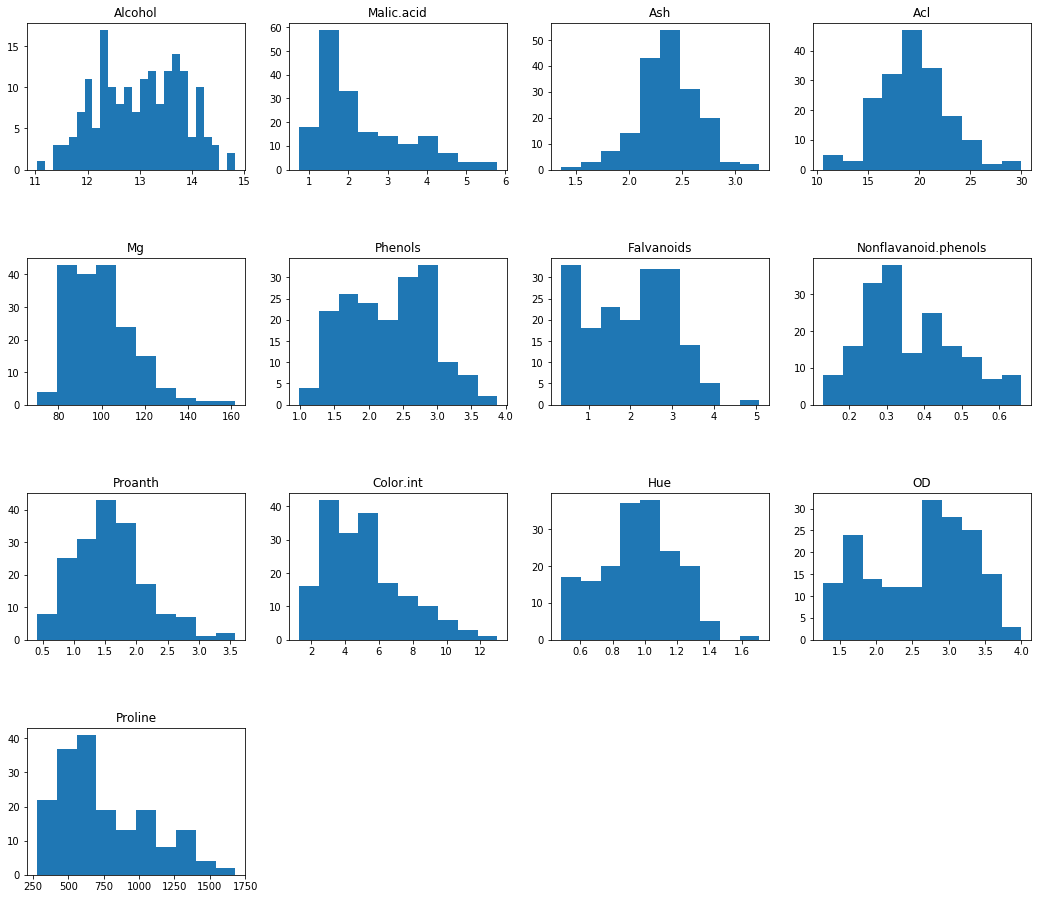

In [21]:
import matplotlib.pyplot as plt
df = pd.read_csv('wine.csv')
print(df.columns)
gridsize = (5,4)
# df.fillna(-2)
fig = plt.figure(figsize=(18, 20))
fig.subplots_adjust(hspace=0.6)
ax1 = plt.subplot2grid(gridsize, (1, 0))
ax2 = plt.subplot2grid(gridsize, (1, 1))
ax3 = plt.subplot2grid(gridsize, (1, 2))
ax4 = plt.subplot2grid(gridsize, (1, 3))
ax5 = plt.subplot2grid(gridsize, (2, 0))
ax6 = plt.subplot2grid(gridsize, (2, 1))
ax7 = plt.subplot2grid(gridsize, (2, 2))
ax8 = plt.subplot2grid(gridsize, (2, 3))
ax9 = plt.subplot2grid(gridsize, (3, 0))
ax10 = plt.subplot2grid(gridsize, (3, 1))
ax11 = plt.subplot2grid(gridsize, (3, 2))
ax12 = plt.subplot2grid(gridsize, (3, 3))
ax13 = plt.subplot2grid(gridsize, (4, 0))
ax1.hist(df['Alcohol'],bins=25)
ax1.set_title('Alcohol')
ax2.hist(df['Malic.acid'])
ax2.set_title('Malic.acid')
ax3.hist(df['Ash'])
ax3.set_title('Ash')
ax4.hist(df['Acl'])
ax4.set_title('Acl')
ax5.hist(df['Mg'])
ax5.set_title('Mg')
ax6.hist(df['Phenols'])
ax6.set_title('Phenols')
ax7.hist(df['Flavanoids'])
ax7.set_title('Falvanoids')
ax8.hist(df['Nonflavanoid.phenols'])
ax8.set_title('Nonflavanoid.phenols')
ax9.hist(df['Proanth'])
ax9.set_title('Proanth')
ax10.hist(df['Color.int'])
ax10.set_title('Color.int')
ax11.hist(df['Hue'])
ax11.set_title('Hue')
ax12.hist(df['OD'])
ax12.set_title('OD')
ax13.hist(df['Proline'])
ax13.set_title('Proline')
# print(df.isnull())
# print(df.head())
# print(df.tail())
# df['Alcohol'].hist(bins=25)
# df['Ash'].hist(bins=25)
# df['Malic.acid'].hist(bins=25)
# print(pd.unique(df['Ash']))
# print(df['Ash'].nunique())

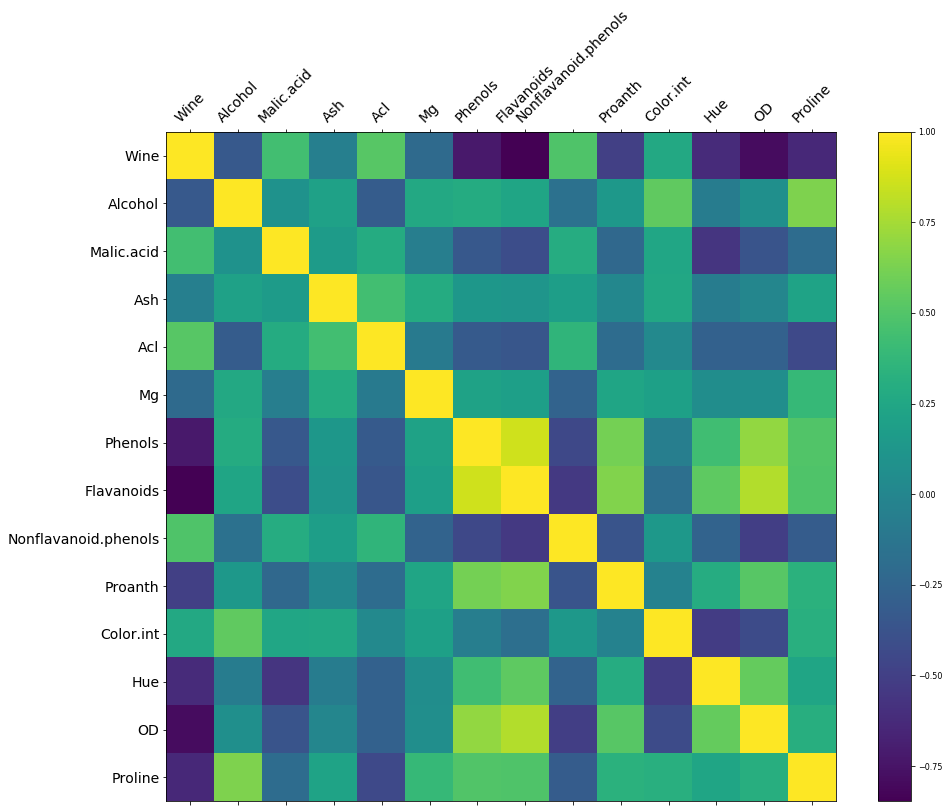

In [22]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15, 12))
plt.matshow(df.corr(method='pearson'), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)

# plt.title('Correlation Matrix', fontsize=16);
# plt.matshow(df.corr())
# plt.show()

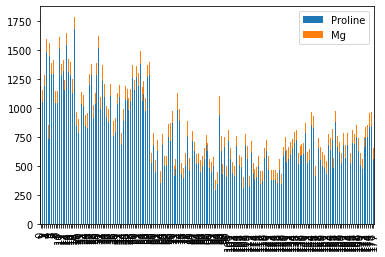

In [23]:
df2 = df[['Proline' , 'Mg']]
df2.plot.bar(stacked=True)

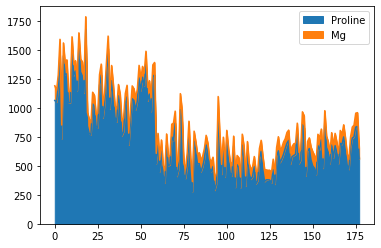

In [24]:
df2.plot.area()

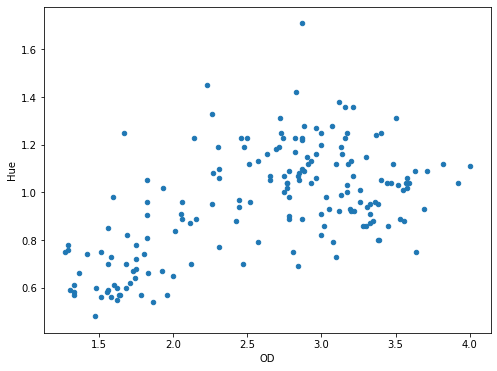

In [25]:
df.plot.scatter(x='OD',y='Hue',figsize=(8,6))

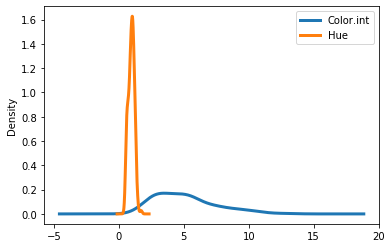

In [26]:
df[['Color.int','Hue']].plot.density(lw=3)